In [6]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os
os.cpu_count()

32

In [8]:
import pickle
import numpy as np
superclass_pkl_path = "/workspace/SMILES_dataset/test/Superclass/index.pkl"
with open(superclass_pkl_path, "rb") as f:
    superclass = pickle.load(f)
superclass, len(superclass)

({8144: ['Oligopeptides'],
  2608: ['Triterpenoids'],
  6986: ['Oligopeptides'],
  7255: ['Macrolides'],
  7035: ['Linear polyketides'],
  1583: ['Polyprenols'],
  4261: ['Carotenoids (C40)'],
  6563: ['Oligopeptides'],
  8206: ['Oligopeptides'],
  11995: ['Oligopeptides'],
  7960: ['Oligopeptides'],
  7751: ['Oligopeptides'],
  1941: ['Triterpenoids'],
  8391: ['Aromatic polyketides'],
  8454: ['Aromatic polyketides'],
  8632: ['Cyclic polyketides'],
  1939: ['Triterpenoids'],
  67: ['unknown'],
  7962: ['Oligopeptides'],
  8351: ['Sphingolipids'],
  9793: ['Macrolides'],
  70: ['unknown'],
  6918: ['Oligopeptides'],
  6750: ['Oligopeptides'],
  12481: ['Fatty amides'],
  7873: ['Oligopeptides'],
  7247: ['Macrolides'],
  8009: ['Oligopeptides'],
  6806: ['Oligopeptides'],
  7835: ['Linear polyketides'],
  7763: ['Oligopeptides'],
  10974: ['Naphthalenes'],
  6709: ['Oligopeptides'],
  6900: ['Oligopeptides'],
  4057: ['Oligopeptides'],
  9689: ['Diterpenoids'],
  6051: ['unknown'],
 

In [9]:
all_classes = sum(superclass.values(), [])
all_classes


['Oligopeptides',
 'Triterpenoids',
 'Oligopeptides',
 'Macrolides',
 'Linear polyketides',
 'Polyprenols',
 'Carotenoids (C40)',
 'Oligopeptides',
 'Oligopeptides',
 'Oligopeptides',
 'Oligopeptides',
 'Oligopeptides',
 'Triterpenoids',
 'Aromatic polyketides',
 'Aromatic polyketides',
 'Cyclic polyketides',
 'Triterpenoids',
 'unknown',
 'Oligopeptides',
 'Sphingolipids',
 'Macrolides',
 'unknown',
 'Oligopeptides',
 'Oligopeptides',
 'Fatty amides',
 'Oligopeptides',
 'Macrolides',
 'Oligopeptides',
 'Oligopeptides',
 'Linear polyketides',
 'Oligopeptides',
 'Naphthalenes',
 'Oligopeptides',
 'Oligopeptides',
 'Oligopeptides',
 'Diterpenoids',
 'unknown',
 'Macrolides',
 'Oligopeptides',
 'unknown',
 'Oligopeptides',
 'Glycerophospholipids',
 'Oligopeptides',
 'Oligopeptides',
 'Oligopeptides',
 'Triterpenoids',
 'Macrolides',
 'Oligopeptides',
 'Triterpenoids',
 'Oligopeptides',
 'Linear polyketides',
 'Macrolides',
 'Terphenyls',
 'Oligopeptides',
 'Small peptides',
 'Meroterpenoi

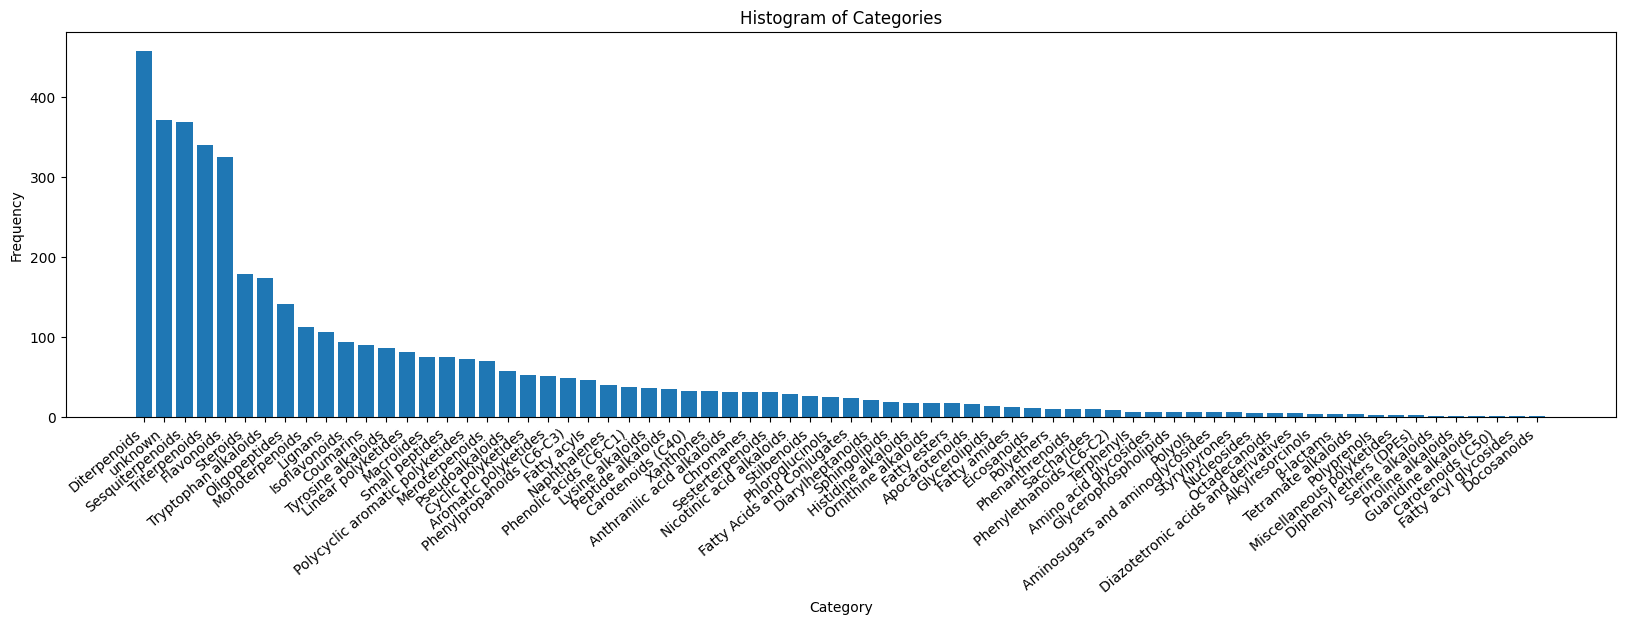

In [10]:
import matplotlib.pyplot as plt
from collections import Counter


# Count occurrences
counts = Counter(all_classes)
counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))
# Extract labels and values
labels, values = zip(*counts.items())

plt.figure(figsize=(20, 5))
# Plot histogram
plt.bar(labels, values)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.xticks(rotation=40, ha='right')  # Rotate labels for readability
plt.title("Histogram of Categories")
plt.show()

In [11]:
top_20, _ = (zip(*list(counts.items())[:21]))
top_20 = list(top_20)
top_20.remove("unknown")
len(top_20), top_20

(20,
 ['Diterpenoids',
  'Sesquiterpenoids',
  'Triterpenoids',
  'Flavonoids',
  'Steroids',
  'Tryptophan alkaloids',
  'Oligopeptides',
  'Monoterpenoids',
  'Lignans',
  'Isoflavonoids',
  'Coumarins',
  'Tyrosine alkaloids',
  'Linear polyketides',
  'Macrolides',
  'Small peptides',
  'Polycyclic aromatic polyketides',
  'Meroterpenoids',
  'Pseudoalkaloids',
  'Cyclic polyketides',
  'Aromatic polyketides'])

In [12]:
import pickle
with open("/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre/top_20_NP_classes.pkl", "wb") as f:
    pickle.dump(top_20, f)

In [13]:

from utils.NP_classwise_accu_plot import compare_results_from_pkl_files


In [14]:
compare_results_from_pkl_files(
    ["random_seed1", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_1/test_result_all_inputs.pkl"],
    ["random_seed2", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_2/test_result_all_inputs.pkl"],
    filter_by=top_20,
)

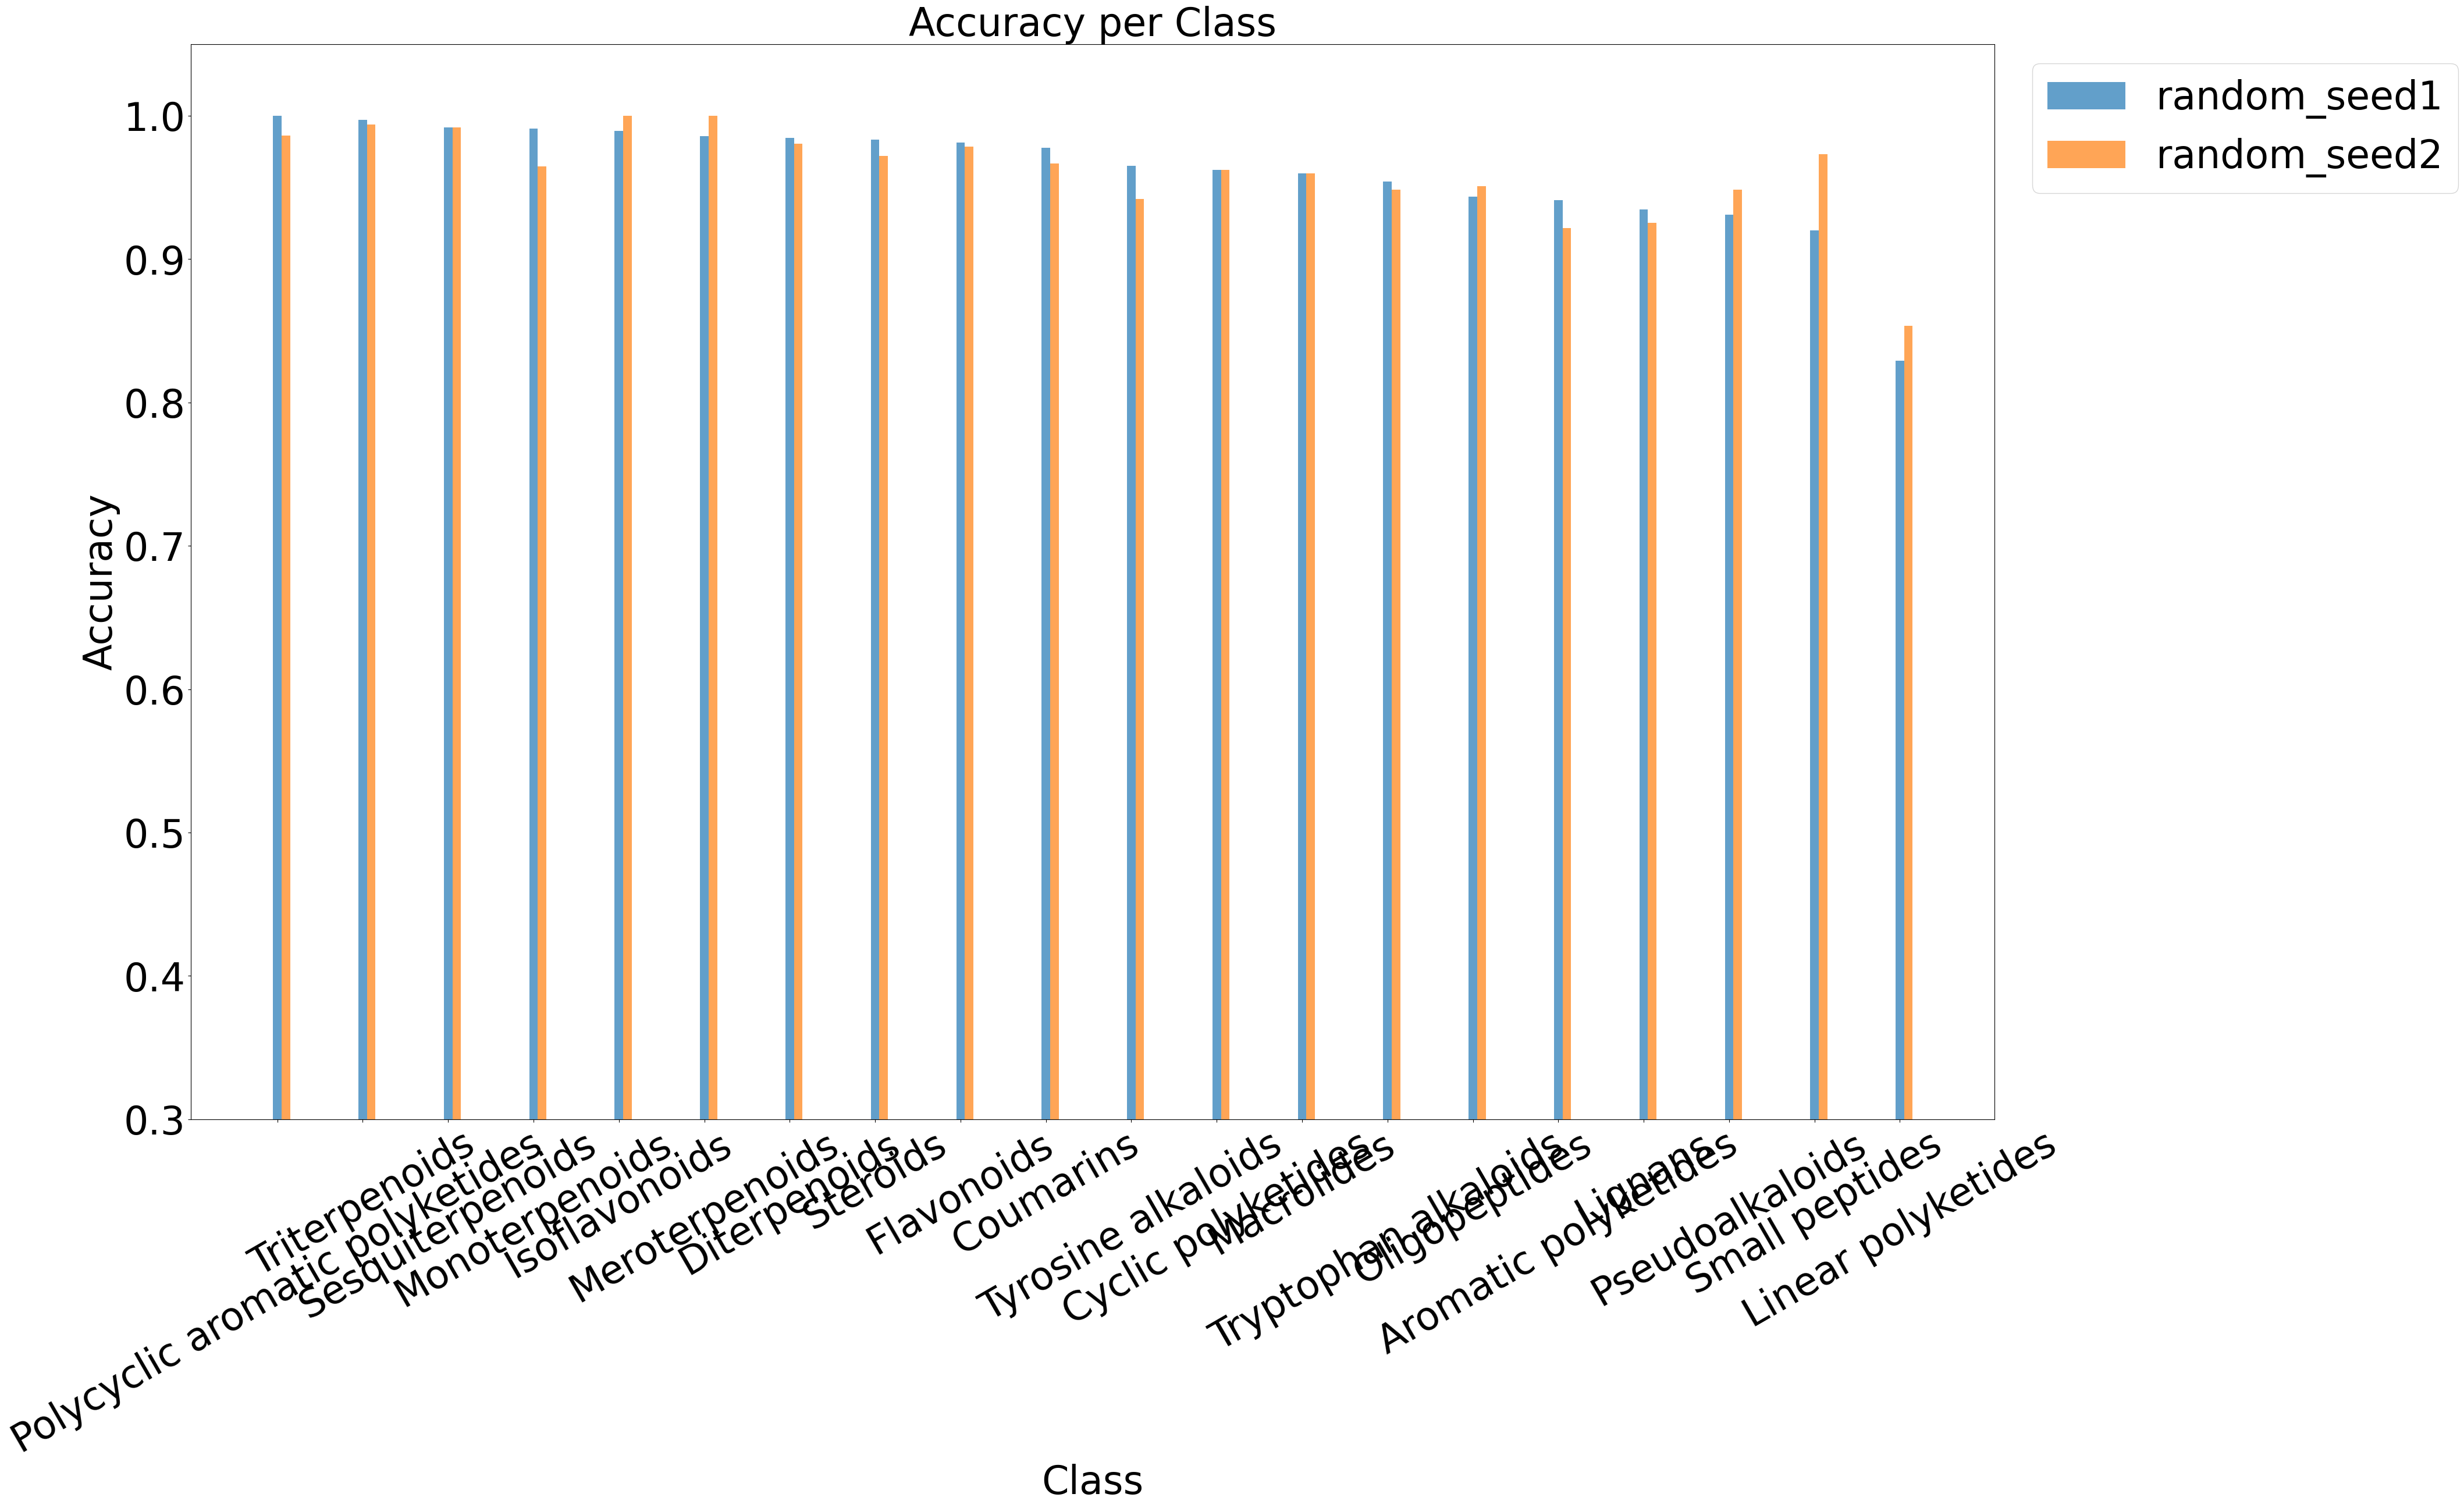

In [15]:
compare_results_from_pkl_files(
    ["random_seed1", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r2_FP_trial_1/test_result_all_inputs.pkl"],
    ["random_seed2", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r2_FP_trial_3/test_result_all_inputs.pkl"],
    filter_by=top_20,
)

In [16]:
# compare_results_from_pkl_files(
#     ["all_3", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_1/test_result_all_inputs.pkl"],
#     ["only_1d", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_1d_trial_1/test_result_np_accu.pkl"],
#     ["HSQC_C", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_1/test_result_HSQC_C_NMR.pkl"],
#     ["HSQC_H", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_1/test_result_HSQC_H_NMR.pkl"],
#     ["only_C", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_c_trial_1/test_result_np_accu.pkl"],
#     ["only_HSQC", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_hsqc_trial_1/test_result_np_accu.pkl"],
#     ["only_H", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_h_trial_1/test_result_np_accu.pkl"],
#     filter_by=top_20,
# )

compare_results_from_pkl_files(
    ["all_3", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_1/test_result_all_inputs.pkl"],
    ["only_1d", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_1d_trial_1/test_result_np_accu.pkl"],
    ["HSQC_C", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_1/test_result_HSQC_C_NMR.pkl"],
    ["HSQC_H", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_1/test_result_HSQC_H_NMR.pkl"],
    ["only_C", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_c_trial_1/test_result_np_accu.pkl"],
    ["only_HSQC", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_hsqc_trial_1/test_result_np_accu.pkl"],
    ["only_H", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_h_trial_1/test_result_np_accu.pkl"],
    filter_by=top_20,
)

FileNotFoundError: [Errno 2] No such file or directory: '/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_hsqc_trial_1/test_result_np_accu.pkl'

In [32]:
def compare_results_with_error_bars(*name_and_accu_results, save_path=None, filter_by=None):
    # result is {name: (accuracy_mean, accuracy_std)}
    print(name_and_accu_results[0])
    name1, result1 = name_and_accu_results[0]
    if filter_by is not None:
        result1 = {k: v for k, v in result1.items() if k in filter_by}
    accuracy_dict1 = sorted(result1.items(), key=lambda x: x[1][0], reverse=True)

    np_names, accus_data1 = zip(*accuracy_dict1)
    accus_mean1 = [data[0] for data in accus_data1]
    
    x = np.arange(len(result1), dtype=float)
    bar_width = 0.1
    x -= bar_width * (len(name_and_accu_results) - 1) / 2
    x_copy = x.copy()
    
    # plt.figure(figsize=(10*len(name_and_accu_results), 24))
    plt.figure(figsize=(70, 24))
    
    for label_name, result in name_and_accu_results:
        accus_mean = [result[name][0] for name in np_names]
        accus_std = [result[name][1] for name in np_names]

        # Plot bars
        bars = plt.bar(x, accus_mean, yerr=accus_std, width=bar_width, alpha=0.7, label=label_name, capsize=5, error_kw=dict(lw=2))

        # Annotate bars with values
        # for bar, mean in zip(bars, accus_mean):
        #     plt.text(bar.get_x() + bar.get_width()/2, mean + 0.01, f'{mean:.3f}', ha='center', va='bottom', fontsize=36)

        x += bar_width  # Shift x positions for next bars

    plt.ylabel("Accuracy", fontsize=48)
    plt.xlabel("Natural Product Class", fontsize=48)
    plt.title("Rank-1 Accuracy per Class with Error Bars", fontsize=48)
    plt.ylim(0.0, 0.7)
    plt.yticks(fontsize=48)
    plt.xticks(x_copy - 0.1, np_names, rotation=60, fontsize=48)
    plt.tick_params(axis='y', direction='inout', length=10, width=2)  # `inout` makes ticks extend both ways
    plt.grid(axis='y', linestyle='--',)  # Optional: Add grid lines for better readability
    
    plt.legend(fontsize=48, bbox_to_anchor=(1.01, 1))
    
    if save_path is not None:
        plt.savefig(save_path)
    
    plt.show()
    plt.close()
    
    
# def compare_results_from_pkl_files(name1, pkl1, name2, pkl2, save_path=None):
def compare_results_from_pkl_files_with_error_bars(*name_and_pkls, save_path=None, filter_by=None):
    name_and_accu_results = []
    for name_and_pkl in name_and_pkls:
        name, *pkls = name_and_pkl
        result = get_avg_and_std_from_pkl_files(*pkls)
        name_and_accu_results.append((name, result))
    # compare_results(result1, result2, save_path=save_path)
    print(name_and_accu_results[0])
    compare_results_with_error_bars(*name_and_accu_results, save_path=save_path, filter_by=filter_by)
    
def get_avg_and_std_from_pkl_files(*pkls):
    from collections import defaultdict
    result = defaultdict(list)
    for pkl in pkls:
        with open(pkl, "rb") as f:
            curr_val = pickle.load(f)
            for k, v in curr_val.items():
                result[k].append(v)
    result = {k: (np.mean(v), np.std(v)) for k, v in result.items()}
    return result   

In [33]:
# compare_results_from_pkl_files_with_error_bars(
#     ["all_3", 
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_1/test_result_all_inputs.pkl",
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_2/test_result_all_inputs.pkl",
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_3/NP_class_accu_epoch=96-all_inputs.pkl"],
#     ["only_1d", 
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_1d_trial_1/test_result_np_accu.pkl",
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_1d_trial_2/NP_class_accu.pkl",
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_1d_trial_3/NP_class_accu.pkl"],
    
#     ["HSQC_C",
#      "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_1/test_result_HSQC_C_NMR.pkl",
#      "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_2/test_result_HSQC_C_NMR.pkl",
#      "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_3/NP_class_accu_epoch=96-HSQC_C_NMR.pkl"],
    
#     ["HSQC_H", 
#      "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_1/test_result_HSQC_H_NMR.pkl",
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_2/test_result_HSQC_H_NMR.pkl",
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/larger_flexible_models_3072dim/r0_r4_FP_trial_3/NP_class_accu_epoch=98-HSQC_H_NMR.pkl"],
    
#     ["only_C", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_c_trial_1/test_result_np_accu.pkl",
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_c_trial_2/NP_class_accu.pkl",
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_c_trial_3/NP_class_accu.pkl"],
    
#     ["only_H", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_h_trial_1/test_result_np_accu.pkl",
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_h_trial_2/NP_class_accu.pkl",
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_h_trial_3/NP_class_accu.pkl"],
    
#     ["only_HSQC", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_hsqc_trial_1/test_result_np_accu.pkl",
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_hsqc_trial_2/NP_class_accu.pkl",
#     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/stop_on_cosine/all_data_possible/only_hsqc_trial_3/NP_class_accu.pkl"],
#         filter_by=top_20[:7],
# )

('all_3', {'Saccharides': (np.float64(0.2000000054637591), np.float64(0.08164966235113413)), 'Diterpenoids': (np.float64(0.5807860294977824), np.float64(0.010844021242973264)), 'Monoterpenoids': (np.float64(0.5427728494008383), np.float64(0.015041361773066407)), 'Sesquiterpenoids': (np.float64(0.6052393714586893), np.float64(0.008942642051318322)), 'unknown': (np.float64(0.42497754096984863), np.float64(0.007074577521787894)), 'Coumarins': (np.float64(0.5925926168759664), np.float64(0.020951310786361452)), 'Isoflavonoids': (np.float64(0.6666666467984518), np.float64(0.005014941112715252)), 'Phenolic acids (C6-C1)': (np.float64(0.5350877145926157), np.float64(0.04472823242642352)), 'Macrolides': (np.float64(0.36000000437100727), np.float64(0.0288032921155536)), 'Lignans': (np.float64(0.49532710512479144), np.float64(0.007630801321705771)), 'Tryptophan alkaloids': (np.float64(0.509578545888265), np.float64(0.011809226414182215)), 'Pseudoalkaloids': (np.float64(0.26436781386534375), np.fl

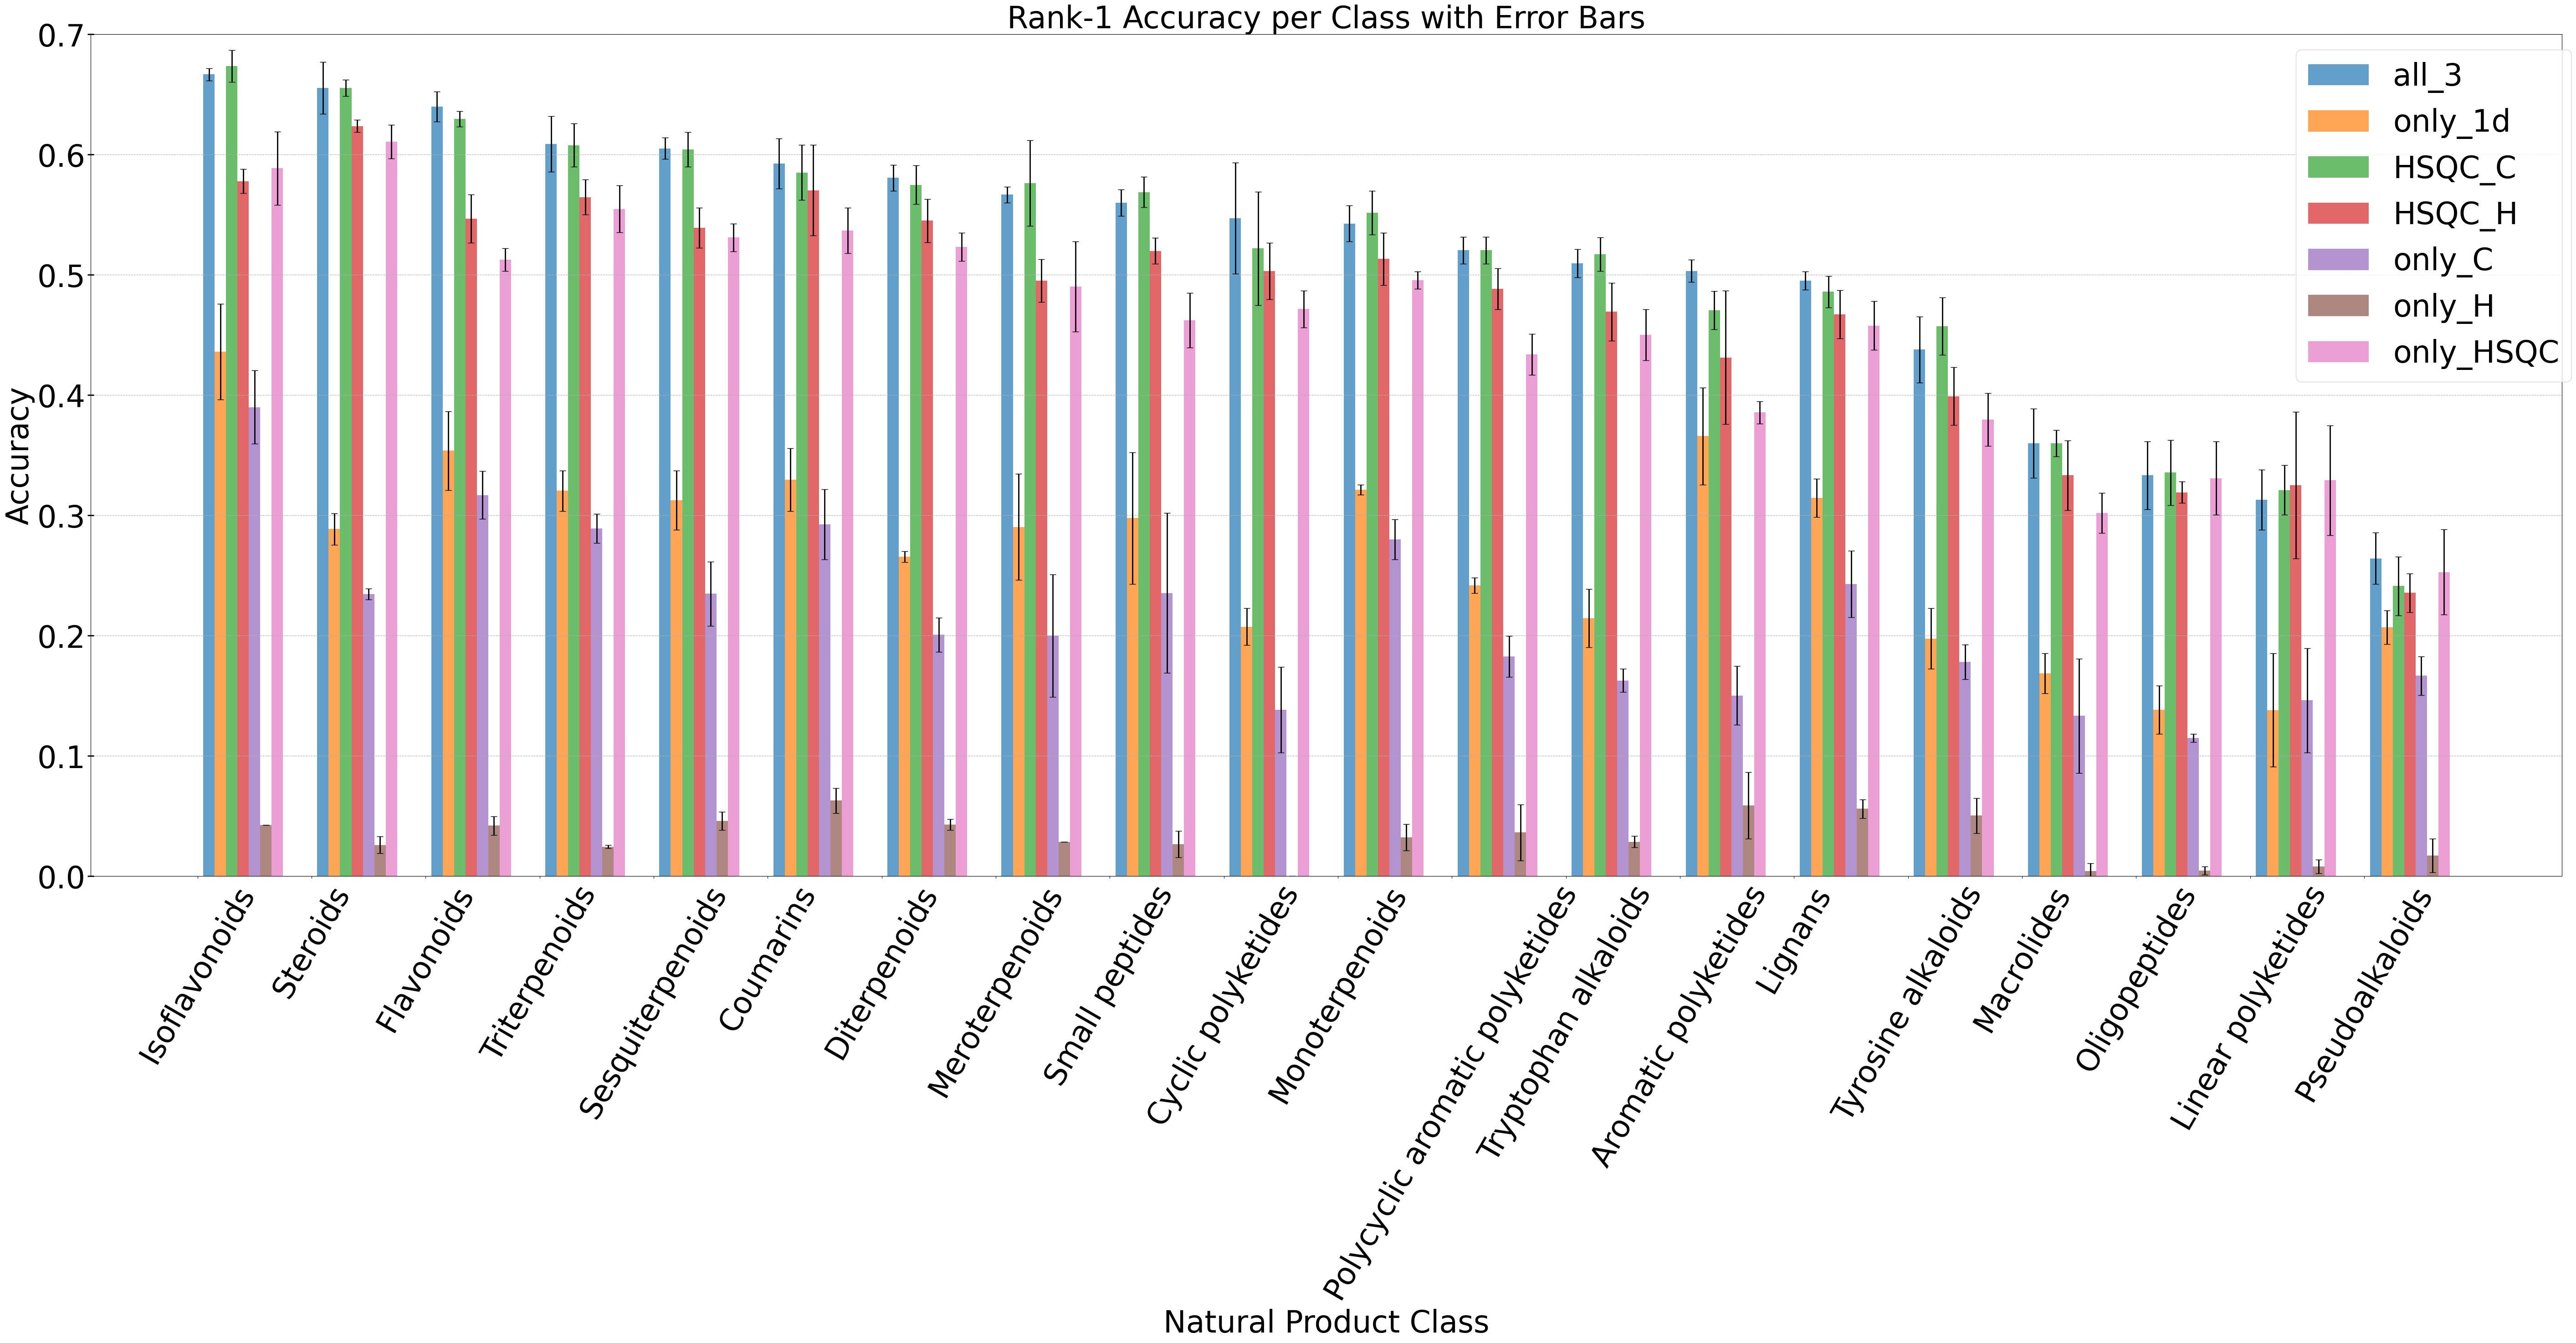

In [34]:
compare_results_from_pkl_files_with_error_bars(
    ["all_3", 
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_all_inputs.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_all_inputs.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_all_inputs.pkl"],
    ["only_1d", 
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_1d.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_1d.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_1d.pkl"],
    
    ["HSQC_C",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_HSQC_C_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_HSQC_C_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_HSQC_C_NMR.pkl"],
    
    ["HSQC_H", 
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_HSQC_H_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_HSQC_H_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_HSQC_H_NMR.pkl"],
    
    ["only_C", 
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_C_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_C_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_C_NMR.pkl"],
    
    ["only_H", 
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_H_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_H_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_H_NMR.pkl"],
    
    ["only_HSQC", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_hsqc.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_hsqc.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_hsqc.pkl"],
        filter_by=top_20,
)

('all_3', {'Saccharides': (np.float64(0.2000000054637591), np.float64(0.08164966235113413)), 'Diterpenoids': (np.float64(0.5807860294977824), np.float64(0.010844021242973264)), 'Monoterpenoids': (np.float64(0.5427728494008383), np.float64(0.015041361773066407)), 'Sesquiterpenoids': (np.float64(0.6052393714586893), np.float64(0.008942642051318322)), 'unknown': (np.float64(0.42497754096984863), np.float64(0.007074577521787894)), 'Coumarins': (np.float64(0.5925926168759664), np.float64(0.020951310786361452)), 'Isoflavonoids': (np.float64(0.6666666467984518), np.float64(0.005014941112715252)), 'Phenolic acids (C6-C1)': (np.float64(0.5350877145926157), np.float64(0.04472823242642352)), 'Macrolides': (np.float64(0.36000000437100727), np.float64(0.0288032921155536)), 'Lignans': (np.float64(0.49532710512479144), np.float64(0.007630801321705771)), 'Tryptophan alkaloids': (np.float64(0.509578545888265), np.float64(0.011809226414182215)), 'Pseudoalkaloids': (np.float64(0.26436781386534375), np.fl

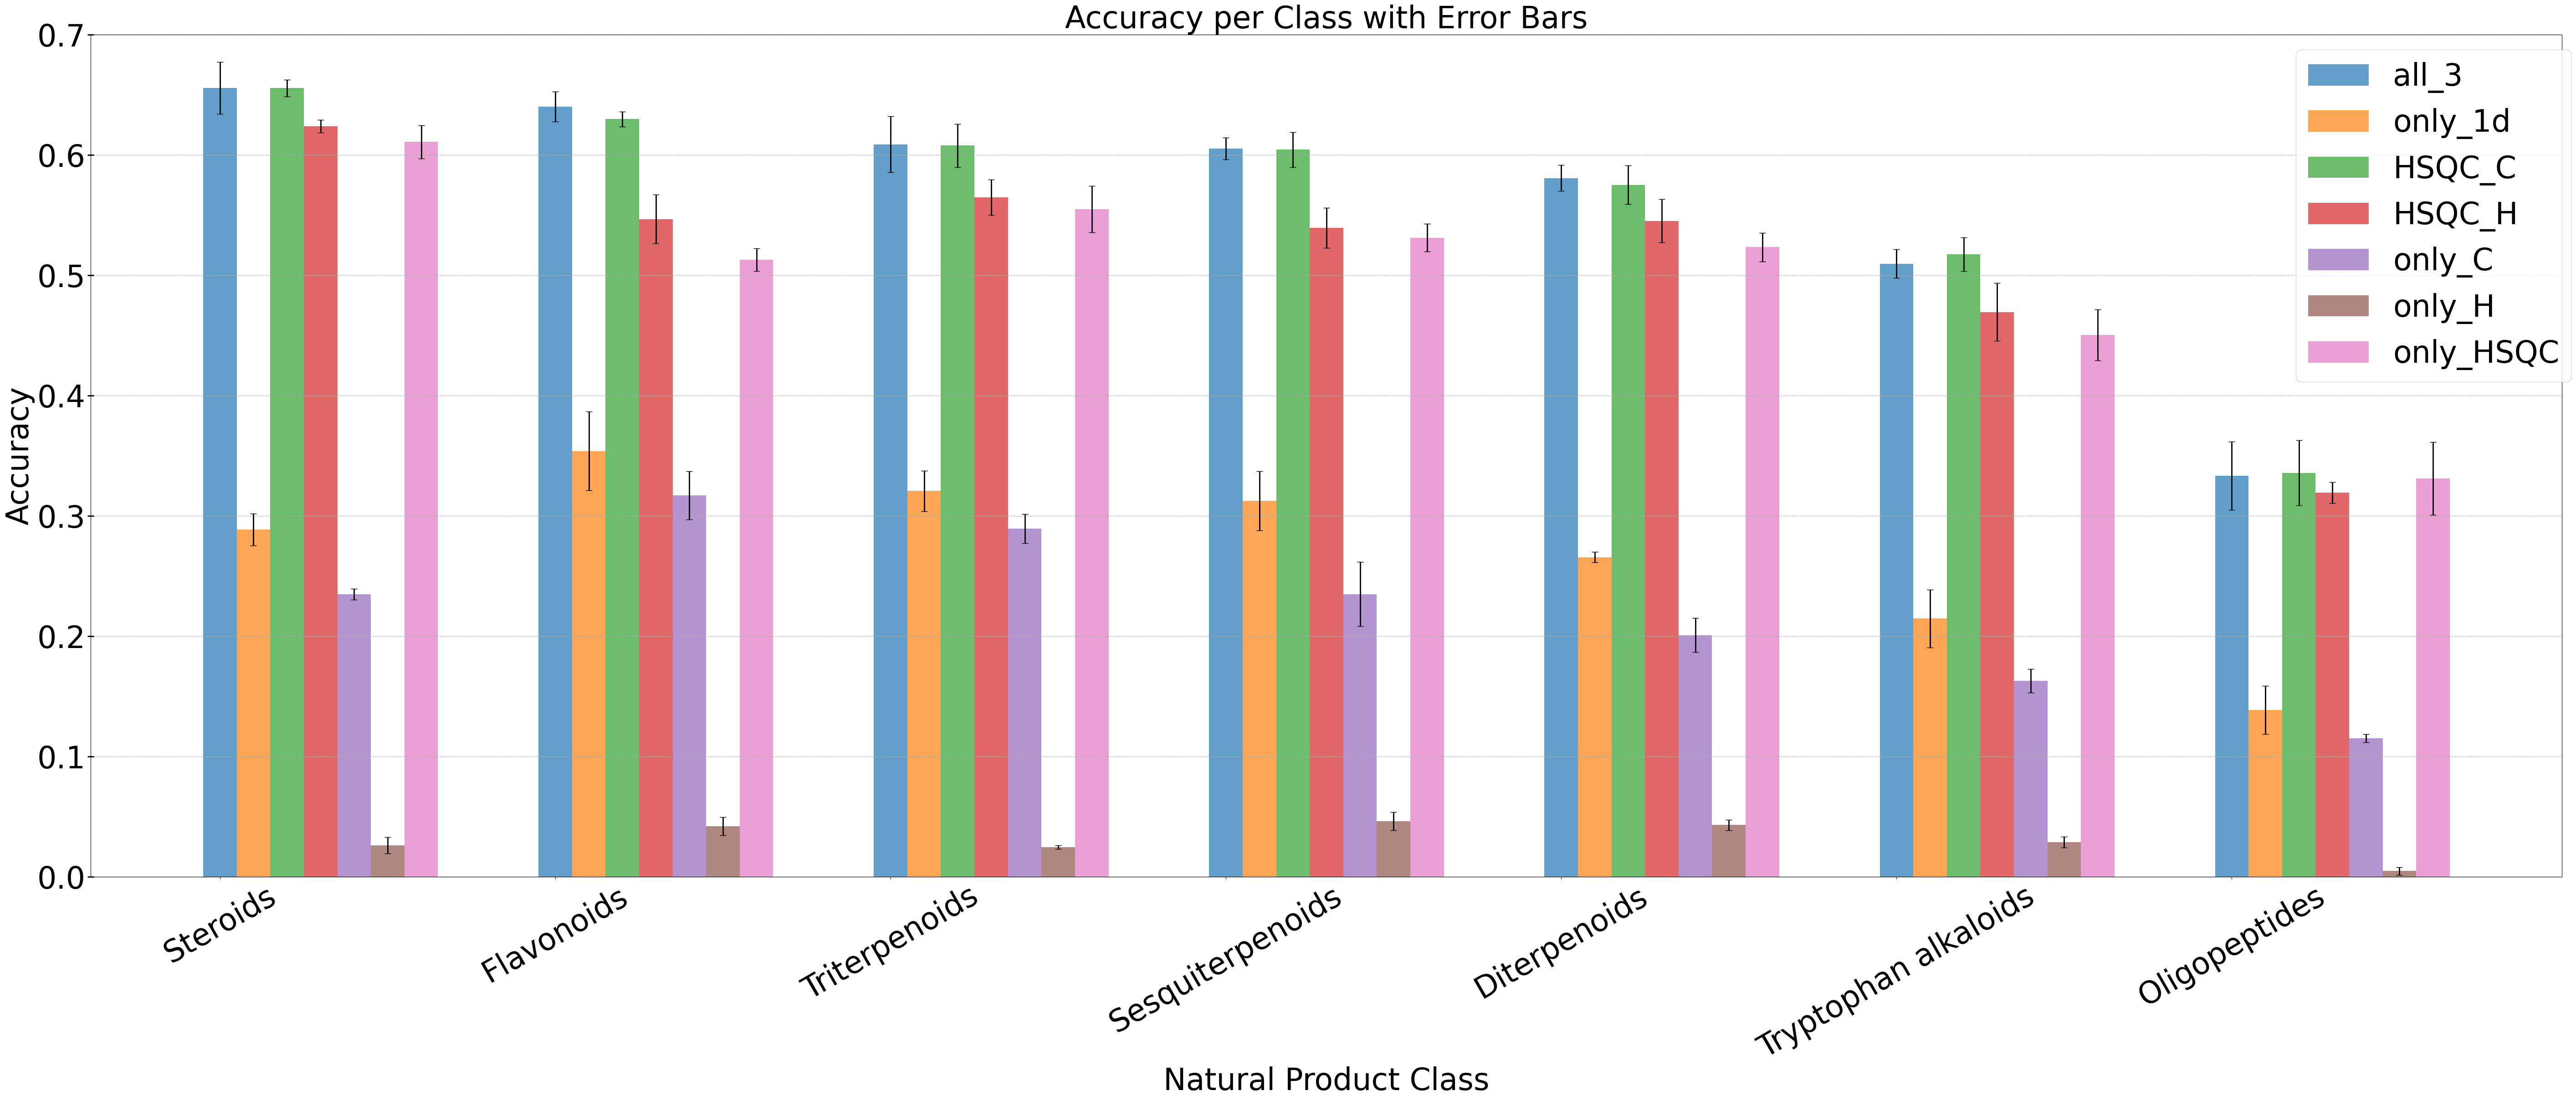

In [18]:
compare_results_from_pkl_files_with_error_bars(
    ["all_3", 
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_all_inputs.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_all_inputs.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_all_inputs.pkl"],
    ["only_1d", 
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_1d.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_1d.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_1d.pkl"],
    
    ["HSQC_C",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_HSQC_C_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_HSQC_C_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_HSQC_C_NMR.pkl"],
    
    ["HSQC_H", 
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_HSQC_H_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_HSQC_H_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_HSQC_H_NMR.pkl"],
    
    ["only_C", 
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_C_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_C_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_C_NMR.pkl"],
    
    ["only_H", 
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_H_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_H_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_H_NMR.pkl"],
    
    ["only_HSQC", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_hsqc.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_hsqc.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_hsqc.pkl"],
        filter_by=top_20[:7],
)

In [19]:
compare_results_from_pkl_files_with_error_bars(
    ["all_3", 
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_all_inputs.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_all_inputs.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_all_inputs.pkl"],
    ["only_1d", 
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_1d.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_1d.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_1d.pkl"],
    
    ["HSQC_C",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_HSQC_C_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_HSQC_C_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_HSQC_C_NMR.pkl"],
    
    ["HSQC_H", 
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_HSQC_H_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_HSQC_H_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_HSQC_H_NMR.pkl"],
    
    ["only_C", 
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_C_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_C_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_C_NMR.pkl"],
    
    ["only_H", 
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_H_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_H_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_H_NMR.pkl"],
    
    ["only_HSQC", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_hsqc.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_hsqc.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_hsqc.pkl"],
        filter_by=top_20[7:14],
)

('all_3', {'Saccharides': (np.float64(0.2000000054637591), np.float64(0.08164966235113413)), 'Diterpenoids': (np.float64(0.5807860294977824), np.float64(0.010844021242973264)), 'Monoterpenoids': (np.float64(0.5427728494008383), np.float64(0.015041361773066407)), 'Sesquiterpenoids': (np.float64(0.6052393714586893), np.float64(0.008942642051318322)), 'unknown': (np.float64(0.42497754096984863), np.float64(0.007074577521787894)), 'Coumarins': (np.float64(0.5925926168759664), np.float64(0.020951310786361452)), 'Isoflavonoids': (np.float64(0.6666666467984518), np.float64(0.005014941112715252)), 'Phenolic acids (C6-C1)': (np.float64(0.5350877145926157), np.float64(0.04472823242642352)), 'Macrolides': (np.float64(0.36000000437100727), np.float64(0.0288032921155536)), 'Lignans': (np.float64(0.49532710512479144), np.float64(0.007630801321705771)), 'Tryptophan alkaloids': (np.float64(0.509578545888265), np.float64(0.011809226414182215)), 'Pseudoalkaloids': (np.float64(0.26436781386534375), np.fl

('all_3', {'Saccharides': (np.float64(0.2000000054637591), np.float64(0.08164966235113413)), 'Diterpenoids': (np.float64(0.5807860294977824), np.float64(0.010844021242973264)), 'Monoterpenoids': (np.float64(0.5427728494008383), np.float64(0.015041361773066407)), 'Sesquiterpenoids': (np.float64(0.6052393714586893), np.float64(0.008942642051318322)), 'unknown': (np.float64(0.42497754096984863), np.float64(0.007074577521787894)), 'Coumarins': (np.float64(0.5925926168759664), np.float64(0.020951310786361452)), 'Isoflavonoids': (np.float64(0.6666666467984518), np.float64(0.005014941112715252)), 'Phenolic acids (C6-C1)': (np.float64(0.5350877145926157), np.float64(0.04472823242642352)), 'Macrolides': (np.float64(0.36000000437100727), np.float64(0.0288032921155536)), 'Lignans': (np.float64(0.49532710512479144), np.float64(0.007630801321705771)), 'Tryptophan alkaloids': (np.float64(0.509578545888265), np.float64(0.011809226414182215)), 'Pseudoalkaloids': (np.float64(0.26436781386534375), np.fl

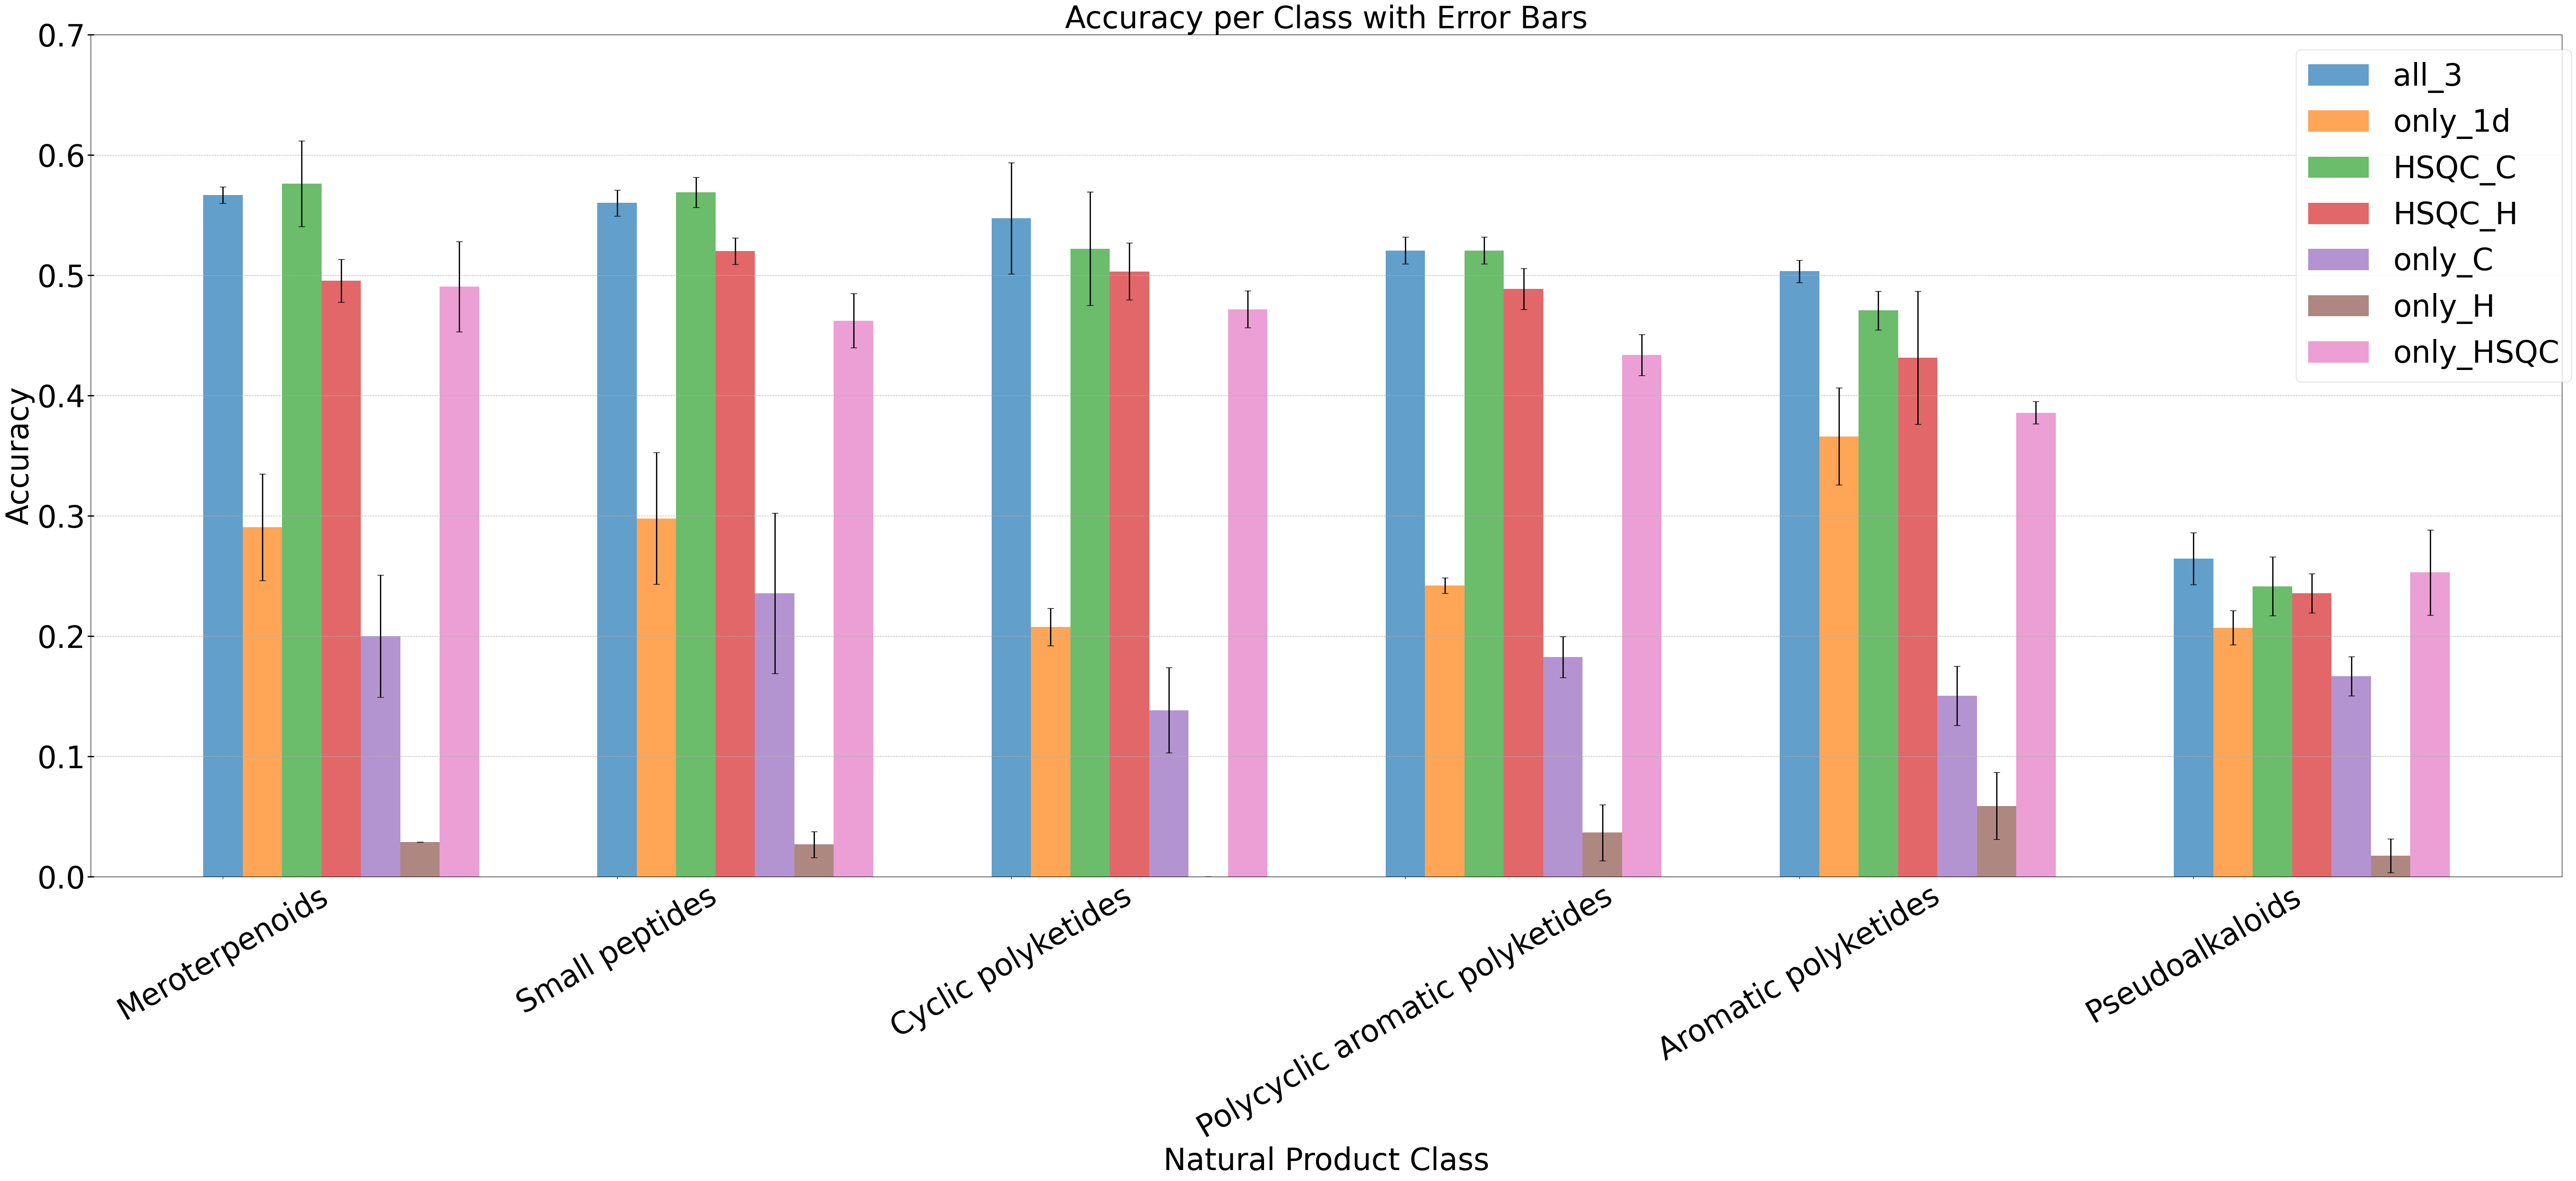

In [20]:
compare_results_from_pkl_files_with_error_bars(
    ["all_3", 
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_all_inputs.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_all_inputs.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_all_inputs.pkl"],
    ["only_1d", 
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_1d.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_1d.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_1d.pkl"],
    
    ["HSQC_C",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_HSQC_C_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_HSQC_C_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_HSQC_C_NMR.pkl"],
    
    ["HSQC_H", 
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_HSQC_H_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_HSQC_H_NMR.pkl",
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_HSQC_H_NMR.pkl"],
    
    ["only_C", 
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_C_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_C_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_C_NMR.pkl"],
    
    ["only_H", 
     "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_H_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_H_NMR.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_H_NMR.pkl"],
    
    ["only_HSQC", "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_1/NP_class_accu_only_hsqc.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_2/NP_class_accu_only_hsqc.pkl",
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/flexible_models_jittering_size_1/r0_r6_trial_3/NP_class_accu_only_hsqc.pkl"],
        filter_by=top_20[14:],
)